<a href="https://colab.research.google.com/github/m-tabish-rehman/ColabMDA/blob/main/Copy_of_Full_MD_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive_mount/')

Mounted at /content/drive_mount/


In [24]:
# Create a directory for GROMACS installation in Google Drive
!mkdir -p "/content/drive/MyDrive/gmx"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [25]:
# Change to the installation directory
%cd "/content/drive/MyDrive/gmx"

/content/drive/MyDrive/gmx


In [26]:
# Print the current working directory
%pwd

'/content/drive/MyDrive/gmx'

In [27]:
# Check GPU information
!nvidia-smi

Sun Oct 27 10:10:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [28]:
# Upgrade cmake
!pip install --upgrade cmake

In [29]:
# Install dependencies
!apt update -y
!apt upgrade -y
!apt install -y gcc cmake build-essential libfftw3-dev nvidia-cuda-toolkit

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,071 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
G

In [30]:
# Download and install hwloc
!wget https://download.open-mpi.org/release/hwloc/v1.11/hwloc-1.11.13.tar.gz
!tar xzf hwloc-1.11.13.tar.gz
%cd hwloc-1.11.13
!./configure
!make
!sudo make install
%cd ..

--2024-10-27 10:14:03--  https://download.open-mpi.org/release/hwloc/v1.11/hwloc-1.11.13.tar.gz
Resolving download.open-mpi.org (download.open-mpi.org)... 3.168.147.13, 3.168.147.103, 3.168.147.84, ...
Connecting to download.open-mpi.org (download.open-mpi.org)|3.168.147.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4487770 (4.3M) [binary/octet-stream]
Saving to: ‘hwloc-1.11.13.tar.gz’

hwloc-1.11.13.tar.g 100%[===================>]   4.28M  19.5MB/s    in 0.2s    

2024-10-27 10:14:03 (19.5 MB/s) - ‘hwloc-1.11.13.tar.gz’ saved [4487770/4487770]

/content/drive/MyDrive/gmx/hwloc-1.11.13

###
### Configuring hwloc distribution tarball
### Startup tests
###
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking target system type... x86_64-unknown-linux-gnu
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mk

In [31]:
# Download GROMACS source code
!wget ftp://ftp.gromacs.org/gromacs/gromacs-2023.1.tar.gz
!tar xfz gromacs-2023.1.tar.gz

--2024-10-27 10:14:49--  ftp://ftp.gromacs.org/gromacs/gromacs-2023.1.tar.gz
           => ‘gromacs-2023.1.tar.gz’
Resolving ftp.gromacs.org (ftp.gromacs.org)... 130.237.11.165, 2001:6b0:1:1191:216:3eff:fec7:6e30
Connecting to ftp.gromacs.org (ftp.gromacs.org)|130.237.11.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /gromacs ... done.
==> SIZE gromacs-2023.1.tar.gz ... 41934072
==> PASV ... done.    ==> RETR gromacs-2023.1.tar.gz ... done.
Length: 41934072 (40M) (unauthoritative)

gromacs-2023.1.tar. 100%[===================>]  39.99M  13.8MB/s    in 2.9s    

2024-10-27 10:14:54 (13.8 MB/s) - ‘gromacs-2023.1.tar.gz’ saved [41934072]



In [32]:
# Run CMake to configure GROMACS installation path
!cmake -B "/content/drive/MyDrive/gmx/gromacs-2023.1/build" \
  -S "/content/drive/MyDrive/gmx/gromacs-2023.1" \
  -DGMX_BUILD_OWN_FFTW=ON \
  -DREGRESSIONTEST_DOWNLOAD=ON \
  -DGMX_GPU=CUDA \
  -DGMX_MPI=OFF \
  -DGMX_OPENMP=OFF \
  -DGMX_DOUBLE=OFF \
  -DCMAKE_INSTALL_PREFIX="/content/drive/MyDrive/gmx/gromacs" \
  -DCUDA_TOOLKIT_ROOT_DIR=/usr/local/cuda \
  -DCMAKE_C_COMPILER=gcc \
  -DCMAKE_CXX_COMPILER=g++

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/gcc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/g++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Python3: /usr/local/bin/python (found suitable version "3.10.12", minimum required is "3.7") found components: Interpreter Development Development.Module Development.Embed
-- Selected GPU FFT library - cuFFT
-- Performing Test CFLAGS_PRAGMA
-- Performing Test CFLAGS_PRAGMA - Success
-- Performing Test CFLAGS_WARN_NO_MISSING_FIELD_INITIALIZERS
-- Performing Test CFLAGS_WARN_NO_MISSING_FIELD_INITIALIZERS - Success
-- Performing Test CFLAGS_EXCESS_PREC
-- Performing Test CFLAGS_EXCES

In [33]:
# Give execute permissions to the configure script explicitly:
!chmod +x /content/drive/MyDrive/gmx/gromacs-2023.1/build/src/external/build-fftw/fftwBuild-prefix/src/fftwBuild/configure

chmod: cannot access '/content/drive/MyDrive/gmx/gromacs-2023.1/build/src/external/build-fftw/fftwBuild-prefix/src/fftwBuild/configure': No such file or directory


In [34]:
# Build and install GROMACS
!cmake --build "/content/drive/MyDrive/gmx/gromacs-2023.1/build" -j4
!cmake --build "/content/drive/MyDrive/gmx/gromacs-2023.1/build" --target install

[  0%] Creating directories for 'fftwBuild'
[  0%] Building CXX object src/gromacs/selection/CMakeFiles/scanner.dir/parser.cpp.o
[  0%] Generating release version information
[  0%] Building CXX object src/gromacs/CMakeFiles/thread_mpi.dir/__/external/thread_mpi/src/errhandler.cpp.o
[  0%] Built target release-version-info
[  0%] Performing download step (download, verify and extract) for 'fftwBuild'
-- Downloading...
   dst='/content/drive/MyDrive/gmx/gromacs-2023.1/build/src/external/build-fftw/fftwBuild-prefix/src/fftw-3.3.8.tar.gz'
   timeout='none'
   inactivity timeout='none'
-- Using src='http://www.fftw.org/fftw-3.3.8.tar.gz'
[  0%] Building C object src/gromacs/CMakeFiles/tng_io_obj.dir/__/external/tng_io/src/compression/bwlzh.c.o
[  0%] Building CXX object src/gromacs/CMakeFiles/thread_mpi.dir/__/external/thread_mpi/src/tmpi_malloc.cpp.o
-- [download 0% complete]
-- [download 1% complete]
-- [download 2% complete]
-- [download 4% complete]
-- [download 5% complete]
-- [downlo

In [35]:
# Check that GROMACS works
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
gmx -h

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (no)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive/MyDrive/gmx
Command line:
  gmx -h


GROMACS reminds you: "Is That a Real Poncho ?" (F. Zappa)



In [19]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [36]:
# upgrade cmake; required for GROMACS 2021 or higher version
# !pip install cmake --upgrade

#Installing py3Dmol using pip
!pip install py3Dmol

#Importing py3Dmol for safety
import py3Dmol

#Installing biopython using pip
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.7 MB/s eta 0:00:00


In [41]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive_mount')

Mounted at /content/drive_mount


In [42]:
# Change Working Directory
import os
dir = "/content/drive_mount/MyDrive/MAO-A/"
if not os.path.exists(dir):
    os.makedirs(dir)
%cd /content/drive_mount/MyDrive/MAO-A/
!pwd

/content/drive_mount/MyDrive/MAO-A
/content/drive_mount/MyDrive/MAO-A


In [43]:
# access permission and check if gromacs works
%%bash
chmod +x "/content/drive/MyDrive/gmx/gromacs/bin/gmx"
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
gmx -h

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (no)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx -h


GROMACS reminds you: "There is an infinite set A that is not too big." (John von Neumann)



In [44]:
# Download the mdp file first and make necessary changes in mdp parameters
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
wget -O ions.mdp https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/ions.mdp
wget -O md.mdp https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/md.mdp
wget -O em.mdp https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/em.mdp
wget -O npt.mdp https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/npt.mdp
wget -O nvt.mdp https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/nvt.mdp

--2024-10-27 11:14:32--  https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/ions.mdp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 980 [text/plain]
Saving to: ‘ions.mdp’

     0K                                                       100% 60.3M=0s

2024-10-27 11:14:32 (60.3 MB/s) - ‘ions.mdp’ saved [980/980]

--2024-10-27 11:14:32--  https://raw.githubusercontent.com/m-tabish-rehman/ColabMDA/refs/heads/main/md.mdp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2681 (2.6K) [text/plain]
Saving to: ‘md.mdp’


In [39]:
pwd

'/content/drive/MyDrive/gmx'

In [ ]:
#Importing your PDB file using biopython
import os
from Bio.PDB import *
pdbid = ['1aki']
pdbl = PDBList()
for s in pdbid:
  pdbl.retrieve_pdb_file(s, pdir='.', file_format ="pdb", overwrite=True)
  os.rename("pdb"+s+".ent", s+".pdb")

In [45]:
# We will constantly need to source GMXRC for GROMACS to work
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx pdb2gmx -f abc.pdb -o abc_processed.gro -water spce -ignh -ff oplsaa

Using the Oplsaa force field in directory oplsaa.ff

going to rename oplsaa.ff/aminoacids.r2b
Reading abc.pdb...
Read '', 4100 atoms

Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.

There are 1 chains and 0 blocks of water and 513 residues with 4100 atoms

  chain  #res #atoms

  1 'A'   513   4100  

All occupancies are one

Reading residue database... (Oplsaa)

Processing chain 1 'A' (4100 atoms, 513 residues)

Identified residue HIS12 as a starting terminus.

Identified residue LEU524 as a ending terminus.
Start terminus HIS-12: NH3+
End terminus LEU-524: COO-

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 513 residues with 8200 atoms

Making bonds...

Number of bonds was 8302, now 8302

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 22055 dihedrals, 1644 impropers, 15028 angles
          21648 pairs,     8302 bonds and     0 virtual sites

Total ma

                     :-) GROMACS - gmx pdb2gmx, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx pdb2gmx -f abc.pdb -o abc_processed.gro -water spce -ignh -ff oplsaa

Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/aminoacids.r2b
All occupancies are one
Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/atomtypes.atp
Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/aminoacids.rtp
Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/aminoacids.hdb
Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/aminoacids.n.tdb
Opening force field file /content/drive/MyDrive/gmx/gromacs/share/gromacs/top/oplsaa.ff/aminoacids.c.tdb
Analysing hydrogen-bonding network for automated a

In [46]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx editconf -f complex.gro -o newbox.gro -c -d 1.0 -bt cubic

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 8250 atoms
Volume: 1 nm^3, corresponds to roughly 400 electrons
No velocities found
    system size :  9.298  7.642  6.405 (nm)
    diameter    : 10.493               (nm)
    center      :  3.462  2.785 -2.000 (nm)
    box vectors :  1.000  1.000  1.000 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :   1.00               (nm^3)
    shift       :  2.784  3.462  8.246 (nm)
new center      :  6.246  6.246  6.246 (nm)
new box vectors : 12.493 12.493 12.493 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :1949.77               (nm^3)


                     :-) GROMACS - gmx editconf, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx editconf -f complex.gro -o newbox.gro -c -d 1.0 -bt cubic


GROMACS reminds you: "Insane In Tha Membrane" (Cypress Hill)



In [47]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx solvate -cp newbox.gro -cs spc216.gro -o solv.gro -p topol.top


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------

Adding line for 61106 solvent molecules with resname (SOL) to topology file (topol.top)


                     :-) GROMACS - gmx solvate, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx solvate -cp newbox.gro -cs spc216.gro -o solv.gro -p topol.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...
Generating solvent configuration
Will generate new solvent configuration of 7x7x7 boxes
Solvent box contains 210567 atoms in 70189 residues
Removed 19782 solvent atoms due to solvent-solvent overlap
Removed 7467 solvent atoms due to solute-solvent overlap
Sorting configuration
Found 1 molecule type:
    SOL (   3 atoms): 61106 residues
Generated solvent containing 183318 atoms in 61106 residues
Writing generated configuration to solv.gro

Output configuration contains 191568 atoms in 61620 residues
Volume                 :     1949.77 (nm^3)
Density                :     990.877 (g/l)
Number of s

In [48]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr -maxwarn 1

Setting the LD random seed to 1864316662

Generated 372816 of the 372816 non-bonded parameter combinations

Generated 372816 of the 372816 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'UNL'

Excluding 2 bonded neighbours molecule type 'SOL'
Analysing residue names:
There are:   513    Protein residues
There are:     1      Other residues
There are: 61106      Water residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

This run will generate roughly 15 Mb of data


                      :-) GROMACS - gmx grompp, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr -maxwarn 1


NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5

NOTE 2 [file topol.top, line 77464]:
  System has non-zero total charge: 2.000000
  Total charge should normally be an integer. See
  http://www.gromacs.org/Documentation/Floating_Point_Arithmetic
  for discussion on how close it should be to an integer.



Number of degrees of freedom in T-Coupling group rest is 391383.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

NOTE 3 [file ions.mdp]:
  You are using a pl

In [56]:
!echo "SOL" > options
!echo "" >> options

In [59]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr -maxwarn 1

gmx make_ndx -f solv.gro -o index.ndx >>editconf
q
EOF

gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral -conc 0.15 -n index.ndx < echo 15

Setting the LD random seed to -1112612883

Generated 372816 of the 372816 non-bonded parameter combinations

Generated 372816 of the 372816 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'UNL'

Excluding 2 bonded neighbours molecule type 'SOL'
Analysing residue names:
There are:   513    Protein residues
There are:     1      Other residues
There are: 61106      Water residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

This run will generate roughly 15 Mb of data


                      :-) GROMACS - gmx grompp, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr -maxwarn 1


NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5

NOTE 2 [file topol.top, line 77464]:
  System has non-zero total charge: 2.000000
  Total charge should normally be an integer. See
  http://www.gromacs.org/Documentation/Floating_Point_Arithmetic
  for discussion on how close it should be to an integer.



Number of degrees of freedom in T-Coupling group rest is 391383.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

NOTE 3 [file ions.mdp]:
  You are using a pl

In [63]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx grompp -f em.mdp -c solv.gro -p topol.top -o em.tpr -maxwarn 1

gmx mdrun -v -deffnm em -nb gpu -ntmpi 1

Setting the LD random seed to -16900897

Generated 372816 of the 372816 non-bonded parameter combinations

Generated 372816 of the 372816 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'UNL'

Excluding 2 bonded neighbours molecule type 'SOL'

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
J. S. Hub, B. L. de Groot, H. Grubmueller, G. Groenhof
Quantifying Artifacts in Ewald Simulations of Inhomogeneous Systems with a Net
Charge
J. Chem. Theory Comput. 10 (2014) pp. 381-393
-------- -------- --- Thank You --- -------- --------

Analysing residue names:
There are:   513    Protein residues
There are:     1      Other residues
There are: 61106      Water residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

The largest distance between excluded atoms is 0.448 nm between atom 24 and 31
Calculating fourier grid dimensions for X Y Z
U

                      :-) GROMACS - gmx grompp, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx grompp -f em.mdp -c solv.gro -p topol.top -o em.tpr -maxwarn 1


NOTE 1 [file em.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5

NOTE 2 [file topol.top, line 77464]:
  System has non-zero total charge: 2.000000
  Total charge should normally be an integer. See
  http://www.gromacs.org/Documentation/Floating_Point_Arithmetic
  for discussion on how close it should be to an integer.




WARNING 1 [file topol.top, line 77464]:
  You are using Ewald electrostatics in a system with net charge. This can
  lead to severe artifacts, such as ions moving into regions with low
  dielectric, due to the uni

In [69]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx energy -f em.edr -o potential.xvg < options


Statistics over 1314 steps [ 0.0000 through 1313.0000 ps ], 1 data sets
All statistics are over 1043 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                -3.30554e+06      59000     176377    -384251  (kJ/mol)


                      :-) GROMACS - gmx energy, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx energy -f em.edr -o potential.xvg

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Ryckaert-Bell.
  5  Per.-Imp.-Dih.   6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Disper.-corr.   10  Coulomb-(SR)    11  Coul.-recip.    12  Potential     
 13  Pres.-DC        14  Pressure        15  Vir-XX          16  Vir-XY        
 17  Vir-XZ          18  Vir-YX          19  Vir-YY          20  Vir-YZ        
 21  Vir-ZX          22  Vir-ZY          23  

In [75]:
!echo "Potential" > options
!echo "12" >> options

In [77]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx make_ndx -f lig.gro -o index_lig.ndx
0&!aH*
q

Going to read 0 old index file(s)
Analysing residue names:
There are:     1      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              :    50 atoms
  1 Other               :    50 atoms
  2 UNL                 :    50 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              'res' nr         'chain' char
 "name": group             'case': case sensitive           'q': save and quit
 'ri': residue index

> 
Copied index group 0 'System'
Found 23 atoms with name H*
Complemented group: 27 atoms
Merged two groups with AND: 50 27 -> 27

> 


                     :-) GROMACS - gmx make_ndx, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx make_ndx -f lig.gro -o index_lig.ndx


Reading structure file

GROMACS reminds you: "It is Lunchtime" (A.R. Van Buuren)



In [80]:
cat index_lig.ndx

[ System ]
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
  31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
  46   47   48   49   50
[ Other ]
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
  31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
  46   47   48   49   50
[ UNL ]
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
  31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
  46   47   48   49   50
[ System_&_!H* ]
   2    3    4    5    6    8    9   10   11   12   16   17   20   26   27
  28   29   30   31   32   38   40   41   44   45   47   48


In [98]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

#gmx genrestr -f lig.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000

import subprocess

# Command to run gmx genrestr with automated input
command = [
    gmx genrestr -f lig.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000
]

# Run command and automatically select the group '3' (System_&_!H)
process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
output, error = process.communicate(input="3\n")

# Print the output
print(output)
if error:
    print("Error:", error)


Select group to position restrain
Error: No such group ']'
Error: No such group '#'
Error: No such group 'Run'
Error: No such group 'command'
Error: No such group 'and'
Error: No such group 'automatically'
Error: No such group 'select'
Selected 1: 'Other'


bash: line 5: import: command not found
bash: line 8: =: command not found
                     :-) GROMACS - gmx genrestr, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx genrestr -f lig.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000


Reading structure file
Group     0 (         System) has    50 elements
Group     1 (          Other) has    50 elements
Group     2 (            UNL) has    50 elements
Group     3 (   System_&_!H*) has    27 elements
Select a group: Select a group: Select a group: Select a group: Select a group: Select a group: Select a group: Select a group: 
GROMACS reminds you: "As we all know, blinking lights means science." (Joss Whedon)



In [99]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx make_ndx -f em.gro -o index.ndx

1|13

q

Going to read 0 old index file(s)
Analysing residue names:
There are:   513    Protein residues
There are:     1      Other residues
There are: 61106      Water residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 191568 atoms
  1 Protein             :  8200 atoms
  2 Protein-H           :  4101 atoms
  3 C-alpha             :   513 atoms
  4 Backbone            :  1539 atoms
  5 MainChain           :  2053 atoms
  6 MainChain+Cb        :  2525 atoms
  7 MainChain+H         :  2544 atoms
  8 SideChain           :  5656 atoms
  9 SideChain-H         :  2048 atoms
 10 Prot-Masses         :  8200 atoms
 11 non-Protein         : 183368 atoms
 12 Other               :    50 atoms
 13 UNL                 :    50 atoms
 14 Water               : 183318 atoms
 15 SOL                 : 183318 atoms
 16 non-Water           :  8250 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: li

                     :-) GROMACS - gmx make_ndx, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive_mount/MyDrive/MAO-A
Command line:
  gmx make_ndx -f em.gro -o index.ndx


Reading structure file

Back Off! I just backed up index.ndx to ./#index.ndx.3#

GROMACS reminds you: "Uh-oh" (Tinky Winky)



In [ ]:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"

gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr -maxwarn 2
gmx mdrun -v -deffnm nvt -nb gpu

In [ ]:
# We will run a 100-ns MD simulation,
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o md_100.tpr -maxwarn 1

Setting the LD random seed to -147395109

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...
Analysing residue names:
There are:   129    Protein residues
There are: 10636      Water residues
There are:     8        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.447 nm between atom 1156 and 1405

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup

Reading Coordinates, Velocit

                      :-) GROMACS - gmx grompp, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive/MyDrive/1aki
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group Protein is 4920.79
Number of degrees of freedom in T-Coupling group non-Protein is 63837.21
Last frame         -1 time   10.000   

GROMACS reminds you: "It is now quite lawful for a Catholic woman to avoid pregnancy by a resort to mathematics, though she is still forbidden to resort to physics and chemistry." (Henry Louis Mencken)



In [ ]:
 # Assuming you have one GPU available, the mdrun command to make use of it is as simple as:
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
gmx mdrun -v -deffnm md_100 -nb gpu -ntmpi 1

                      :-) GROMACS - gmx mdrun, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive/MyDrive/1aki
Command line:
  gmx mdrun -deffnm md_0_1 -nb gpu -ntmpi 1

Reading file md_0_1.tpr, VERSION 2023.1 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.167

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
starting mdrun 'LYSOZYME in water'
50000 steps,    100.0 ps.

Writing final coordinates.

NOTE: 21 % of the run time was spent in pair search,
      you might want to increase nstlist (this has no effect on accuracy)

               Core t (s)   Wall t (s)        (%)
       Time:       43.471       43.475      100.0
      

In [ ]:
#Append
%%bash
source "/content/drive/MyDrive/gmx/gromacs/bin/GMXRC"
gmx mdrun -v -cpi md_100.cpt -noappend -deffnm md_100 -gpu_id 0

                      :-) GROMACS - gmx mdrun, 2023.1 (-:

Executable:   /content/drive/MyDrive/gmx/gromacs/bin/gmx
Data prefix:  /content/drive/MyDrive/gmx/gromacs
Working dir:  /content/drive/MyDrive/1aki
Command line:
  gmx mdrun -v -cpi md_0_1.cpt -noappend -deffnm md_0_1 -gpu_id 0

Reading file md_0_1.tpr, VERSION 2023.1 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.167

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
starting mdrun 'LYSOZYME in water'
50000 steps,    100.0 ps (continuing from step 50000,    100.0 ps).

Writing final coordinates.
step 50000, remaining wall clock time:     0 s          
NOTE: 15 % of the run time was spent in pair search,
      you might want to increase nstlist (this has no effect 

# **ANALYSIS**

In [ ]:
# NLP
! python -m pip install nltk==3.5
! python -m pip install numpy matplotlib

# MDAnalysis
! pip install --upgrade MDAnalysis
! pip install --upgrade MDAnalysisTests
! pip install --upgrade MDAnalysisData

# mdtraj, nglview, cython, pytraj, tsplot
# gnuplot, prody
! pip install mdtraj
! pip install nglview
! pip install cython --upgrade
! pip install pytraj
! pip install tsplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=48fcc552cb873a54247de4732af600344e09eaf3cfc5fec4bed6964d51f34b9a
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path

#Then, we define the path of the folder we want to create.
#Notice that the HOME folder for a hosted runtime in colab is /content/
mdpath = Path('/content/gdrive/MyDrive/1aki/')
#mdpath = Path("/content")


#Now, we create the folder using the os.mkdir() command
#The if conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(mdpath):
  print("path already exists")
if not os.path.exists(mdpath):
  os.mkdir(mdpath)
  print("path was succesfully created")

# Change path
#First, we will change to the new folder. We will use python now :)
os.chdir(mdpath)

path already exists


<ipython-input-34-8109bf472043>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


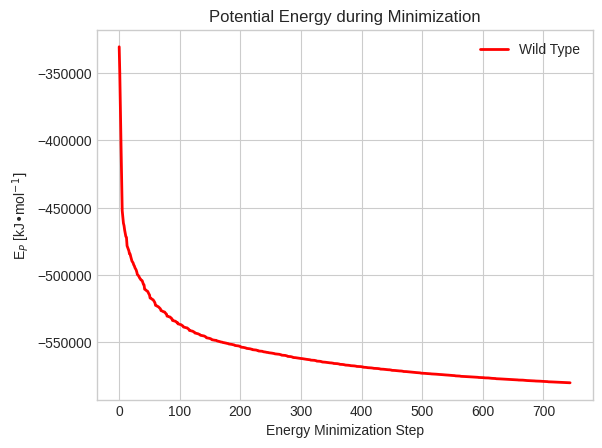

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type potential energy file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/1aki/potential.xvg', comments='@', skiprows=19)

# Mutant potential energy file
#mutant_data = np.loadtxt('/content/gdrive/MyDrive/1aki/em_potential.xvg')

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')

# Plotting wild type potential energy
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant potential energy
#plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('potential_plot.png')

# Show the plot
plt.show()

<ipython-input-38-a220b701ad23>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


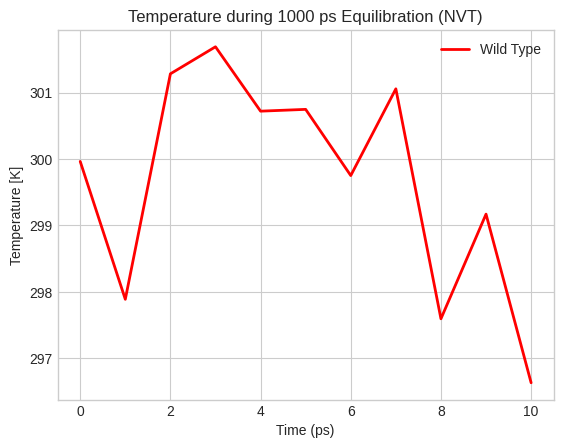

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type temperature file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/1aki/temperature.xvg', comments='@', skiprows=19)

# Mutant temperature file
#mutant_data = np.loadtxt('/content/gdrive/MyDrive/1aki/nvt_temp.xvg')

plt.title('Temperature during 1000 ps Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')

# Plotting wild type temperature
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant temperature
#plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('temperature_plot.png')

# Show the plot
plt.show()

<ipython-input-41-c909284b53b9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


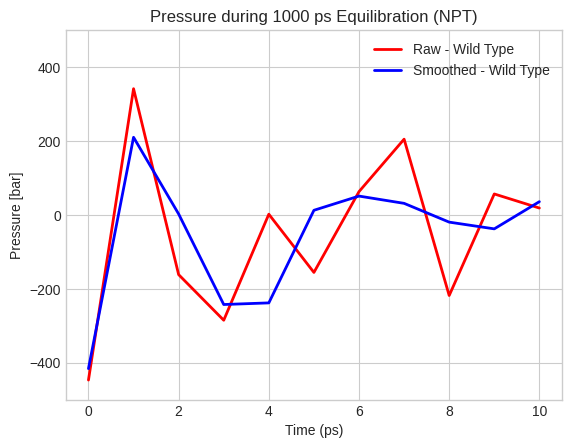

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type pressure file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/1aki/pressure.xvg', comments='@', skiprows=19)

# Mutant pressure file
# mutant_data = np.loadtxt('/content/gdrive/MyDrive/1aki/npt_press_dens.xvg')

plt.title('Pressure during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure [bar]')
plt.ylim(-500,500)

# Smoothing using Savitzky-Golay
from scipy.signal import savgol_filter

# Get the length of the data for the wild type
wild_type_data_length = len(wild_type_data[:, 1])

# Adjust window_length if it's larger than the data length
window_length = min(21, wild_type_data_length - 2)  # -2 to be safe for polyorder 5

wild_type_smoothed = savgol_filter(wild_type_data[:,1], window_length, 5) # Changed window length and explicitly set polyorder
# mutant_smoothed = savgol_filter(mutant_data[:,1], 21, 5)

# Assuming mutant_data has the same structure and potential issue, applying the same fix

# Plotting raw data and smoothed data for wild type
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Raw - Wild Type')
plt.plot(wild_type_data[:,0], wild_type_smoothed, linestyle='solid', linewidth='2', color='blue', label='Smoothed - Wild Type')

# Plotting raw data and smoothed data for mutant
# plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='green', label='Raw - Mutant')
# plt.plot(mutant_data[:,0], mutant_smoothed, linestyle='solid', linewidth='2', color='purple', label='Smoothed - Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('pressure_plot.png')

# Show the plot
plt.show()


<ipython-input-46-2af53733484b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


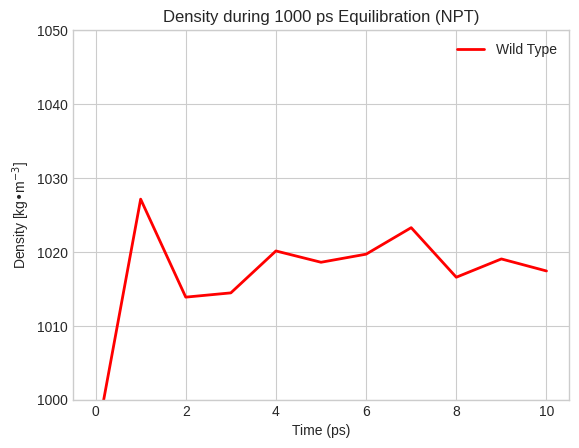

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type density file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/1aki/density.xvg', comments='@', skiprows=19)

# Mutant density file
# mutant_data = np.loadtxt('/content/gdrive/MyDrive/1aki/npt_press_dens.xvg')

plt.title('Density during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Density [kg•m$^{-3}$]')
plt.ylim(1000,1050)

# Plotting wild type density
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant density
# plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('density_plot.png')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


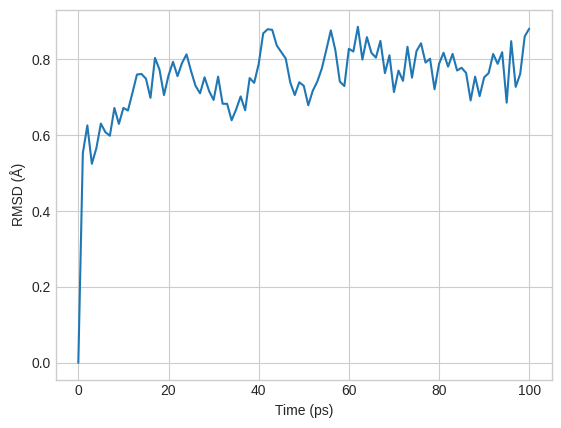

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/1aki/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/1aki/md_0_1.xtc')

# calculate the RMSD
ref = u.select_atoms('protein')
R = rms.RMSD(u, ref, select='backbone', groupselections=['protein'])
R.run()

# plot the RMSD
plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot.png', dpi=300)

# show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


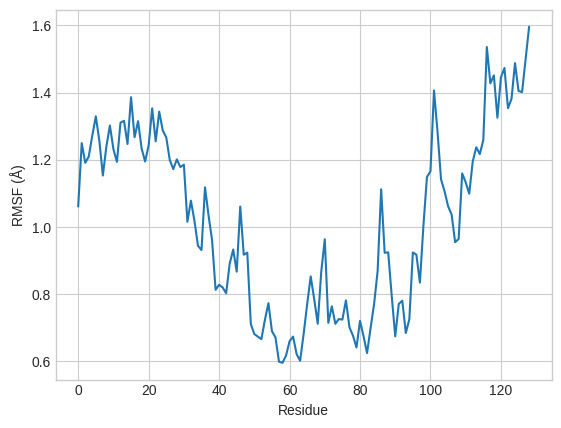

In [ ]:
# rmsf ;  c-alpha
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/1aki/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/1aki/md_0_1.xtc')

# select C-alpha atoms for analysis
calpha = u.select_atoms('protein and name CA')

# calculate the RMSF
R = rms.RMSF(calpha, C_alpha=True).run()
rmsf_analysis = R.rmsf

# plot the RMSF
plt.plot(rmsf_analysis)
plt.xlabel('Residue')
plt.ylabel('RMSF (Å)')

# save the plot as a PNG file
plt.savefig('rmsf_ca_plot.png', dpi=300)

# show the plot
plt.show()

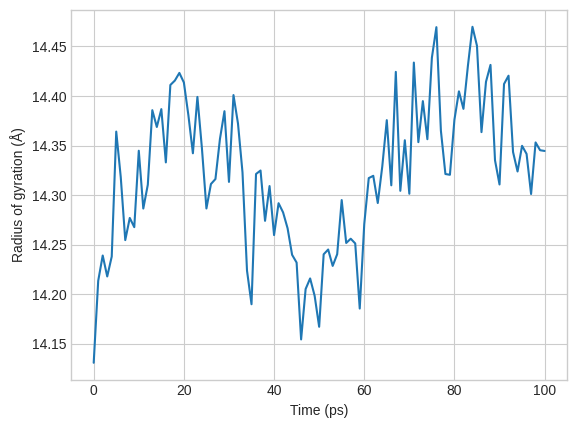

In [ ]:
#Rg
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/1aki/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/1aki/md_0_1.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

# calculate the radius of gyration
com = np.array([protein.center_of_mass()])
Rg_list = []
time_list = []
for ts in u.trajectory:
    Rg = np.sqrt(np.sum((protein.positions - com)**2)/len(protein))
    Rg_list.append(Rg)
    time_list.append(ts.time)

# plot the radius of gyration
plt.plot(time_list, Rg_list)
plt.xlabel('Time (ps)')
plt.ylabel('Radius of gyration (Å)')

# save the plot as a PNG file
plt.savefig('rg_plot.png', dpi=300)

# show the plot
plt.show()

In [ ]:
!pwd

/content/gdrive/MyDrive/1aki


In [ ]:
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/1aki/1AKI_solv_ions.gro', '/content/gdrive/MyDrive/1aki/md_0_1.xtc')
ag = u.select_atoms("name CA")
ag.write("c-alpha.pdb")

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'tempfactors' Using default val

In [ ]:
# Pass in the frames keyword to write out trajectories.
ag.write('c-alpha_all.xtc', frames='all')

In [ ]:
# Slice or index the trajectory to choose which frames to write:
ag.write('c-alpha_skip2.trr', frames=u.trajectory[::2])
ag.write('c-alpha_some.dcd', frames=u.trajectory[[0,2,3]])

In [ ]:
# make xtc to dcd with all frames
ag.write('c-alpha_all.trr', frames='all')
ag.write('c-alpha_all.dcd', frames='all')

In [ ]:
import mdtraj as md
t = md.load('c-alpha_all.xtc', top='c-alpha.pdb')
print(t)

<mdtraj.Trajectory with 101 frames, 129 atoms, 129 residues, and unitcells>


In [ ]:
# lets take a look at the first ten frames
print(t[1:10])

<mdtraj.Trajectory with 9 frames, 129 atoms, 129 residues, and unitcells>


In [ ]:
# lets take a look at the last ten frames
print(t[-10:])

<mdtraj.Trajectory with 10 frames, 129 atoms, 129 residues, and unitcells>


In [ ]:
print(t.xyz.shape)

(101, 129, 3)


In [ ]:
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.restrict_atoms(atoms_to_keep)  # this acts inplace on the trajectory
t.save('CA-only.h5')

In [ ]:
from __future__ import print_function
import mdtraj as md

traj = md.load('CA-only.h5')
print(traj)

<mdtraj.Trajectory with 101 frames, 129 atoms, 129 residues, and unitcells>


/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


In [ ]:
print('How many atoms?    %s' % traj.n_atoms)
print('How many residues? %s' % traj.n_residues)

How many atoms?    129
How many residues? 129


In [ ]:
frame_idx = 4 # zero indexed frame number
atom_idx = 9 # zero indexed atom index
print('Where is the fifth atom at the tenth frame?')
print('x: %s\ty: %s\tz: %s' % tuple(traj.xyz[frame_idx, atom_idx,:]))

Where is the fifth atom at the tenth frame?
x: 4.662	y: 2.6090002	z: 3.7370002


In [ ]:
topology = traj.topology
print(topology)

<mdtraj.Topology with 1 chains, 129 residues, 129 atoms, 0 bonds>


In [ ]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

In [ ]:
traj = md.load('CA-only.h5')

In [ ]:
# compute pairwise rmsd between conformations
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.096216 nm


In [ ]:
# Clustering only accepts reduced form. Squareform's checks are too stringent
# when calculating a massinve numer of frames initially it was 1e-6; changed to 1e6 and the plot generated.
assert np.all(distances - distances.T < 1e6)
reduced_distances = squareform(distances, checks=False)

In [ ]:
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')

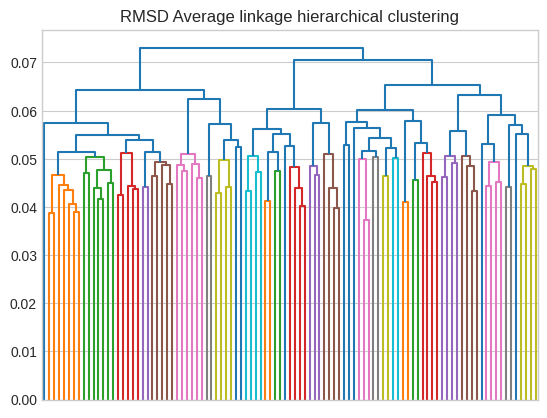

In [ ]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

# save the plot as a PNG file
plt.savefig('RMSD Average linkage hierarchical clustering.png', dpi=300)

# show the plot
plt.show()

In [ ]:
%matplotlib inline
from __future__ import print_function
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
traj = md.load('CA-only.h5')
traj

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


<mdtraj.Trajectory with 101 frames, 129 atoms, 129 residues, and unitcells at 0x7f25e87fc460>

In [ ]:
pca1 = PCA(n_components=2)
traj.superpose(traj, 0)

<mdtraj.Trajectory with 101 frames, 129 atoms, 129 residues, and unitcells at 0x7f25e87fc460>

In [ ]:
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

(101, 2)


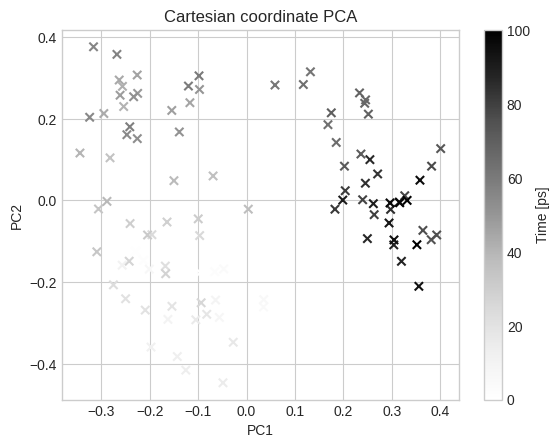

In [ ]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Cartesian coordinate PCA', dpi=300)

# show the plot
plt.show()

In [ ]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

(101, 8256)


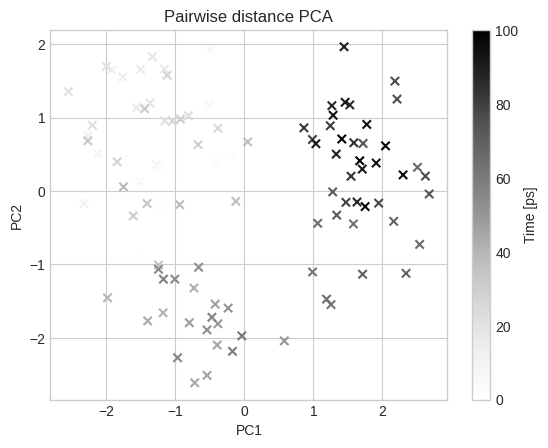

In [ ]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Pairwise distance PCA', dpi=300)

# show the plot
plt.show()

In [ ]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import mdtraj as md

In [ ]:
help(md.shrake_rupley)

Help on function shrake_rupley in module mdtraj.geometry.sasa:

shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', change_radii=None, get_mapping=False)
    Compute the solvent accessible surface area of each atom or residue in each simulation frame.
    
    Parameters
    ----------
    traj : Trajectory
        An mtraj trajectory.
    probe_radius : float, optional
        The radius of the probe, in nm.
    n_sphere_points : int, optional
        The number of points representing the surface of each atom, higher
        values leads to more accuracy.
    mode : {'atom', 'residue'}
        In mode == 'atom', the extracted areas are resolved per-atom
        In mode == 'residue', this is consolidated down to the
        per-residue SASA by summing over the atoms in each residue.
    change_radii : dict, optional
        A partial or complete dict containing the radii to change from the
        defaults. Should take the form {"Symbol" : radii_in_nm }, e.g.
     

In [ ]:
trajectory = md.load('CA-only.h5')
sasa = md.shrake_rupley(trajectory)

print(trajectory)
print('sasa data shape', sasa.shape)

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


<mdtraj.Trajectory with 101 frames, 129 atoms, 129 residues, and unitcells>
sasa data shape (101, 129)


In [ ]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

(101,)


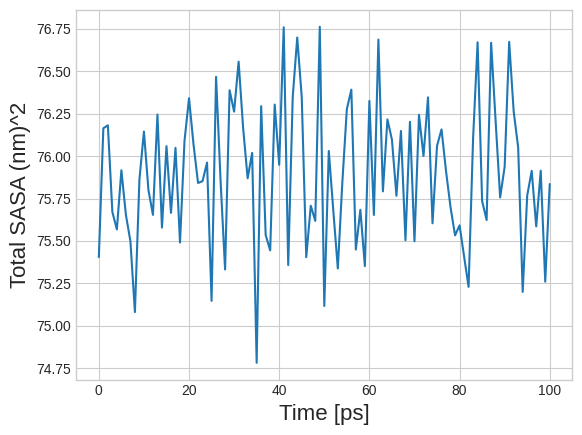

In [ ]:
from matplotlib.pylab import *

plot(trajectory.time, total_sasa)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)


# save the plot as a PNG file
plt.savefig('Total_SASA.png', dpi=300)

# show the plot
plt.show()

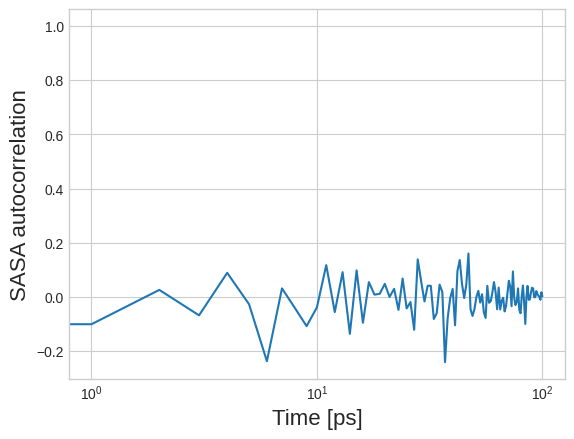

In [ ]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(trajectory.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()